<a href="https://colab.research.google.com/github/sundharaiexpert/into_to_tensorflow_for_ai/blob/main/week-4-happy-sad-handling-images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handling Complex Images - Happy or Sad Dataset**

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import zipfile
from os import path, getcwd, chdir

DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
print("path where the data extracted ")
!ls
!ls ./data
zip_ref.close()


--2022-02-14 23:03:31--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2022-02-14 23:03:31 (141 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]

path where the data extracted 
sample_data
ls: cannot access './data': No such file or directory


In [4]:
from tensorflow.keras.preprocessing.image import load_img

from shutil import copyfile
from os import getcwd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
print("path of os.path")
print(getcwd())
print(os.path)

happy_dir = "./data/happy/"
sad_dir = "./data/sad/"

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

path of os.path
/content
<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>
Sample happy image:


FileNotFoundError: ignored

In [2]:
DESIRED_ACCURACY = 0.999


class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
         if(logs.get('accuracy')>DESIRED_ACCURACY):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

NameError: ignored

In [ ]:
print('total training happy images:', len(os.listdir(happy_dir)))
print('total training sad images:', len(os.listdir(sad_dir)))

total training happy images: 40
total training sad images: 40


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

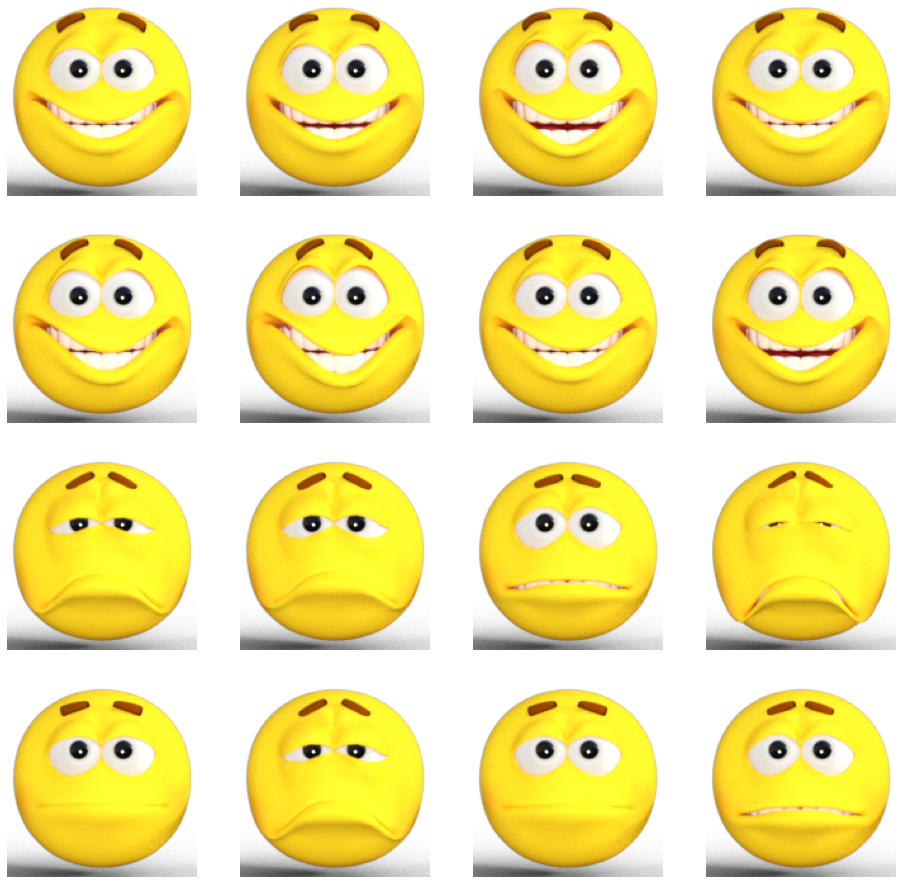

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(happy_dir, fname) 
                for fname in train_happy[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(sad_dir, fname) 
                for fname in train_sad[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# GRADED FUNCTION: image_generator
def image_generator():
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class.
    # Remember to set the rescale argument.
    train_datagen = ImageDataGenerator(rescale=1/255)  
    train_generator =r"./data"

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.

    train_generator = train_datagen.flow_from_directory(
        train_generator,  
        target_size=(150, 150), 
        batch_size=10,
        class_mode='binary')                               
    
    ### END CODE HERE

    return train_generator
    

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [ ]:
#Save your generator in a variable
gen = image_generator()

# Expected output: 'Found 80 images belonging to 2 classes'

In [ ]:
from tensorflow.keras import optimizers, losses

def train_happy_sad_model(train_generator):
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    DESIRED_ACCURACY = 0.999
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>DESIRED_ACCURACY):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    # This code block should call model.fit_generator and train for
    # a number of epochs.
    # model fitting
    history = model.fit(
          train_generator,
          steps_per_epoch=8,  
          epochs=15,
          verbose=1,
          callbacks=[callbacks])
    # model fitting
    return history

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale=1/255)
hist = train_happy_sad_model(gen)

NameError: ignored

In [ ]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")